---
# MATH 2305 (Optional) Final Project 

In this Jupyter notebook you will solve the **minimum spanning tree problem** (**MST**) with **Prim's algorithm**. To do this, you will incrementally (from the top down) run code provided to you in the code cells of this notebook, as well as write your own Python functions to implement aspects of Prim's algorithm. 

We will solve the MST problem on a graph provided on BlackBoard. This graph is stored in the form of a graph edge-weight list in the text file ``sample_weighted_graph.txt``. Thus, before running any code cells below, please make sure that this text file is saved in the current working directory (folder) as this Jupyter notebook. 

After making sure that ``sample_weighted_graph.txt`` is in your current working directory, next run the following code cell which imports the necessary libraries: (click any of the following links for respective documentation)
[matplotlib](https://matplotlib.org), [numpy](https://numpy.org), and [networkx](https://networkx.org). This cell also defines a Python function called ``draw_weighted_graph()`` that takes as input a networkx graph ``G`` and an optional keyword argument ``subgraph`` which is also a networkx graph. This function can be used to visualize a networkx weighted graph, and if a subgraph is provided, also visualize the subgraph inside the supergraph. 

Run the following cell!


---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx 

def draw_weighted_graph(G, subgraph = None):
    # Set your figure size
    plt.figure(figsize=(12, 10))

    # Set your pos
    pos = nx.kamada_kawai_layout(G)

    # Set your graph node options
    graph_node_options = {"node_color": "black", "node_size": 30}

    # Set your graph edge options
    graph_edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

    # Set your subgraph node options
    subgraph_node_options = {"node_color": "red", "node_size": 30}

    # Set your subgraph edge options
    subgraph_edge_options = {"width": .90, "alpha": .5, "edge_color": "red"}

    # Set your node label options
    node_label_options = {"font_size": 15,
                          "font_color": "blue",
                          "verticalalignment": "bottom",
                          "horizontalalignment": "left"}

    # Set your node label options
    weights = {(u, v): z["weight"] for (u, v, z) in G.edges(data=True)}

    edge_label_options = {"font_size": 10,
                          "font_color": "black",
                          "edge_labels": weights}

    # Draw graph nodes
    nx.draw_networkx_nodes(G, pos, **graph_node_options)

    # Draw graph edges
    nx.draw_networkx_edges(G, pos, **graph_edge_options)

    if subgraph != None:
        # Draw graph nodes
        nx.draw_networkx_nodes(subgraph, pos, **subgraph_node_options)

        # Draw graph edges
        nx.draw_networkx_edges(subgraph, pos, **subgraph_edge_options)

    # Draw your node labels
    nx.draw_networkx_labels(G, pos, **node_label_options)

    # Draw your edge labels
    nx.draw_networkx_edge_labels(G, pos, **edge_label_options)
    
    # Show title 
    plt.title("Sample Weighted Graph")
    plt.show()

---

### Reading the weighted graph edge list into memory

In the following code cell write code that reads in the text file ``sample_weighted_graph.txt`` using ``networkx`` and assign this graph to the variable ``G``. After reading your graph in, pass the variable ``G`` into the ``draw_weighted_graph()`` function provided to you above; this will visualize your graph. 

For example, type the following code into the code cell below and run the cell (5 points):

```python
G = nx.read_weighted_edgelist("sample_weighted_graph.txt")
draw_weighted_graph(G)
```

---

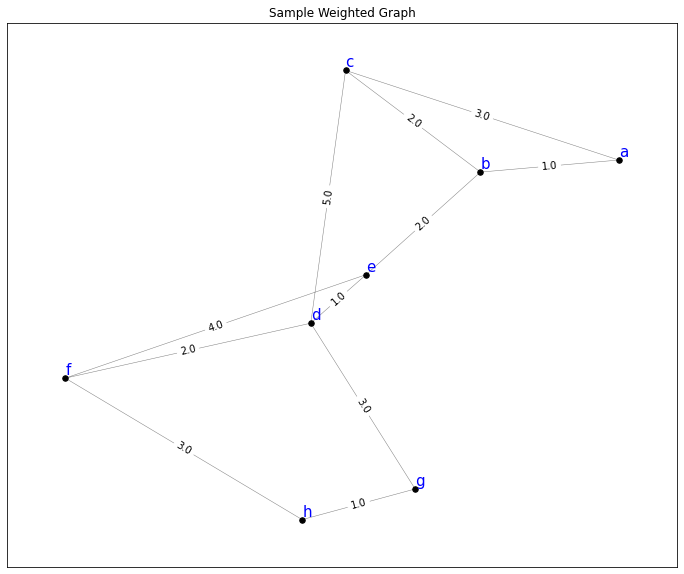

In [3]:
G = nx.read_weighted_edgelist("sample_weighted_graph.txt")
draw_weighted_graph(G)

---
### Sequentially peicing together Prim's algorithm
Before proceeding, recall the psuedo code for Prim's algorithm:


---
**Name.** Prim's

**Input.** A simple weighted graph $G$. 

**Algorithm.** 
1. Initialize a tree $T = (\{v\}, \emptyset)$
2. **while** $T$ is not spanning **do**
3. $ \:\:\:\:\:\:\:$ Add minimum cost edge to $T$ so that $T$ remains a tree. 

**Return.** Minimum cost spanning tree $T$. 

---

### Breaking up an algorithm into smaller tasks

In the following code cells we will split Prim's algorithm into smaller peices of code, in the form of Python functions, that will eventuallu culminate in a single cell of code that easily solves the MST problem by implementing a single function. 

Part 1. of Prim's algorithm initializes a tree on a single arbitrary node contained in the weighted graph $G$. We can easily write a function to do this in a general manor as shown in the following code cell. Note, we make use of the ``numpy.random`` module to randomly sample a node from the nodes in $G$. 

Run the following code cell! (5 points)

---

In [4]:
# Define the initialization function
def initialize_tree(G, initial_vertex = None):
    if initial_vertex == None:
        initial_vertex = np.random.choice(G.nodes())
    T = nx.Graph()
    T.add_node(initial_vertex)
    return T 

---

The function ``initialize_tree()`` is a tree initialization function that will be used at the start of Prim's algorithm. In the following code cell call this function in order to initialize a tree with initial_vertex being "a" (5 points). After doing this, and in the same code cell, use two print statements, both using ``f-strings`` (format strings) that produce the following output (5 points):

```
V(T) = {'a'}
E(T) = set()
```
**Hint.** You will pass ``set(T.nodes)`` and ``set(T.edges)`` into your ``f-strings``. 


Also, in this same code cell draw your graph and current tree using the ``draw_weighted_graph()`` function (5 points). 

The output of your code cell should match the output generated by your instructor.

---

V(T) = {'a'}
E(T) = set()


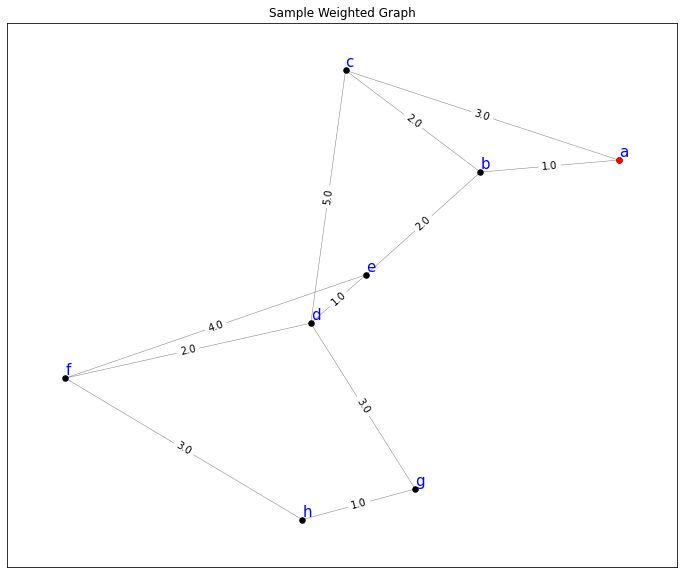

In [29]:
# Initialize your tree starting at node "a"

# assume a is in the graph
assert ('a' in set(G.nodes)), "graph G is initialized incorrectly, 'a' must be present!"

#initialize tree with a
T = initialize_tree(G,'a')

# Print the nodes of T as a set
print(f"V(T) = {set(T.nodes)}")

# Print the edges of T as a set
print(f"E(T) = {set(T.edges)}")


# Visualize your graph and current tree
draw_weighted_graph(G,T)

V(T) = {'a'}
E(T) = set()


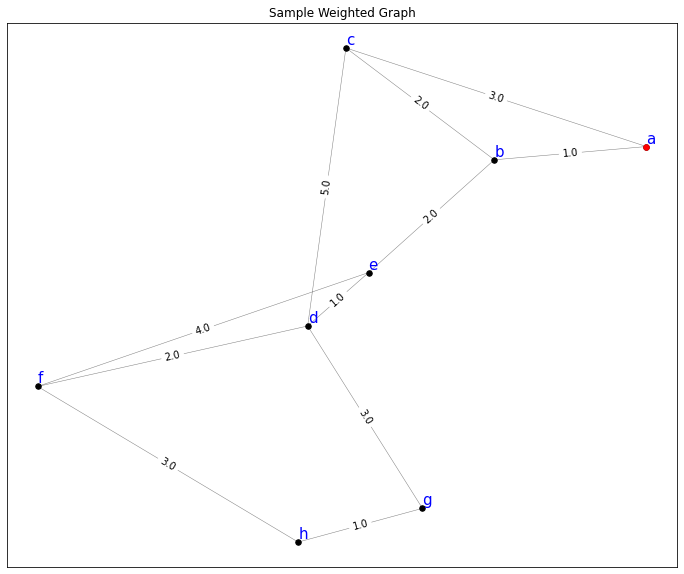

In [ ]:
# Instructor generated the output below

---

In the following code cell write a function called ``valid_edges(G, T)`` that takes as input a graph ``G`` and a tree ``T`` and returns a Python list called ``edges`` containing all of the edges in ``G`` that could be added to ``T`` so that ``T`` remains a tree (30 points). 

**Hints.**
1. Start with a **for** loop over the edges ``e`` in ``G.edges(data = True)``.
2. Append into the Python list ``edges`` and edge ``e`` where **exactly one** of ``e[0]`` and ``e[1]`` appears in ``T.nodes``. 

---

In [30]:
def valid_edges(G, T):
    # Write your code in here!
    edges = []
    node_set = set(T.nodes)

    for e in G.edges(data = True):
      if( (e[0] in node_set and e[1] not in node_set) or 
          (e[1] in node_set and e[0] not in node_set) ):
        edges.append(e)


    return edges

---

Test your function in the following code cell. Your output should be the same as the output generated by my code. (5 points)

---

current_valid_edges = [('a', 'b', {'weight': 1.0}), ('a', 'c', {'weight': 3.0})]


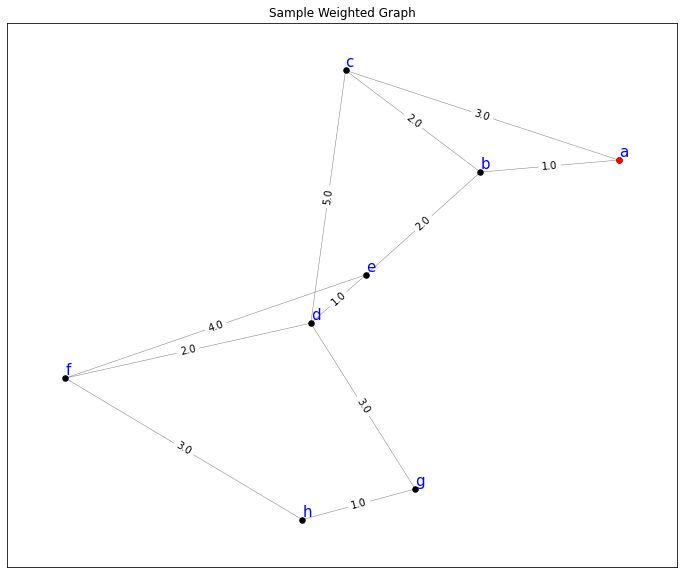

In [31]:
# Find initial valid edges startint with T = ({a}, emptyset)
current_valid_edges = valid_edges(G,T)

# View edges variable
print(f"current_valid_edges = {current_valid_edges}")


# Draw the graph and subtree to varify your functions output
draw_weighted_graph(G,T)


---

In the output above notice that if each each is a 3-tuple, were the 0 and 1 entries are the endpoints of the edge and the 2 entry is a dictionary with key "weight" and key value equal to the numerical weight on that edge. In the following code cell write a function called ``minimum_cost_valid_edge(G, T)`` that takes as input the weighted graph ``G`` and the current tree ``T`` and finds a minimum cost edge that can be added to ``T`` so that ``T`` remains a tree. (20 points)

I have started this function for you. Notice that I used the ``valid_edges()`` function to first find what edges are possible candidates to add. All you have to do is find the minimum cost edge in this Python list. 


---

In [38]:
def minimum_cost_valid_edge(G, T):
    edges = valid_edges(G, T)
    # Write your code in here!

    # get the first edge
    min_cost_edge = edges[0]

    # loop through each edge compairing it with the current min_cost_edge
    # when finished the min_cost_edge will be one of the least cost edges
    for edge in edges:
      if edge[2]['weight'] < min_cost_edge[2]['weight']:
        min_cost_edge = edge

    return min_cost_edge

---

If your function is working then you should be able to run the following cell and varify that you have indeed added the correct edge to ``T``. (5 points)

---

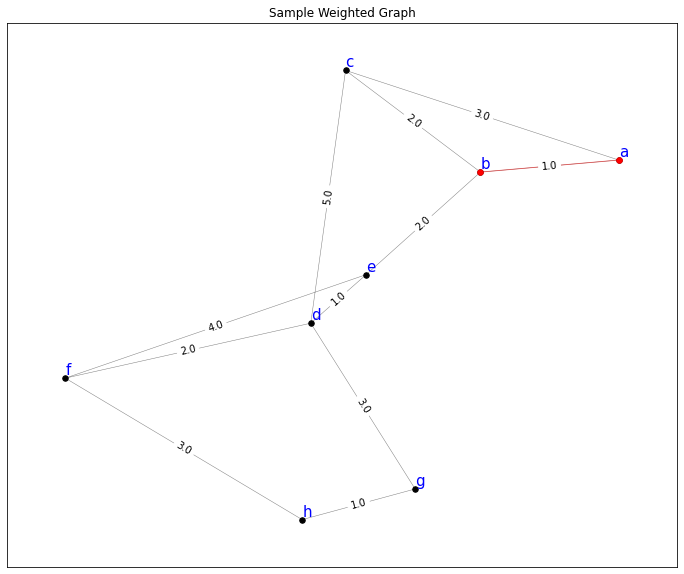

In [33]:
e = minimum_cost_valid_edge(G, T)
T.add_weighted_edges_from([e])
draw_weighted_graph(G, subgraph=T)

---

Run the following cell and varify again that you have indeed added the correct edge to ``T``. (5 points)

---

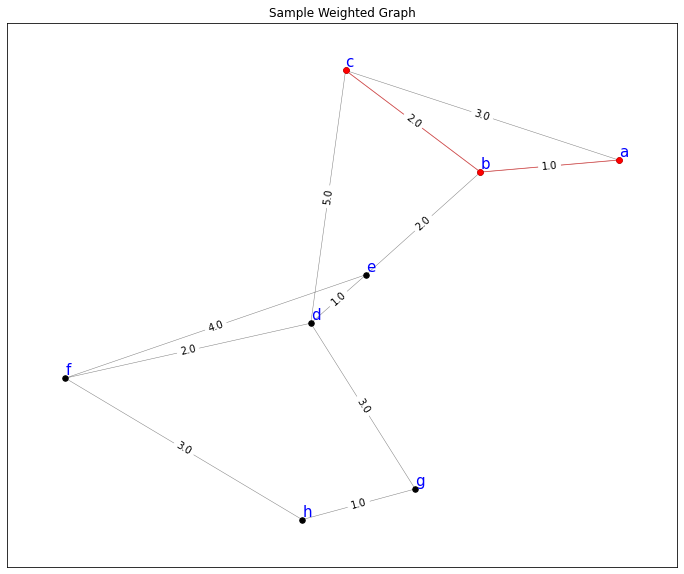

In [34]:
e = minimum_cost_valid_edge(G, T)
T.add_weighted_edges_from([e])
draw_weighted_graph(G, subgraph=T)

---

In the following code cell I give you a function ``is_spanning_subgraph`` which takes as input a graph ``G`` and another graph ``H`` and returns ``True`` if ``H`` is spanning and ``False`` if ``H`` is not spanning. 

Run this cell!


---

In [35]:
def is_spanning_subgraph(G, subgraph):
    return set(subgraph.nodes) == set(G.nodes)

---

In the following code cell peice together all of your functions into a single function implementing Prim's algorithm, call this function ``prims()``. Your function should take as input a networkx graph ``G`` and one keyword optional argument called ``initial_vertex`` which provides the user with the ability to specify which vertex the initial tree starts at.  (10 points)



---

In [39]:
# Write your prims function in here

# prims runs the prims algorithm to find one
# possible MST from the inputed graph
#
# input: an initialized networkX graph, an optional
# initial vertex to start with
#
#output: a minimum spanning tree from G
# 
def prims(G, initial_vertex = None):
  # init T
  T = initialize_tree(G, initial_vertex)

  # while the current tree does not span G
  # add one of the least weighted edges from
  # G to T out of the possible edges which when
  # added to T, T will remain a tree
  while(not is_spanning_subgraph(G,T)):
    next_min_edge = minimum_cost_valid_edge(G,T)
    T.add_weighted_edges_from([next_min_edge])
  return T

---

Solve the MST by running the following code!

---

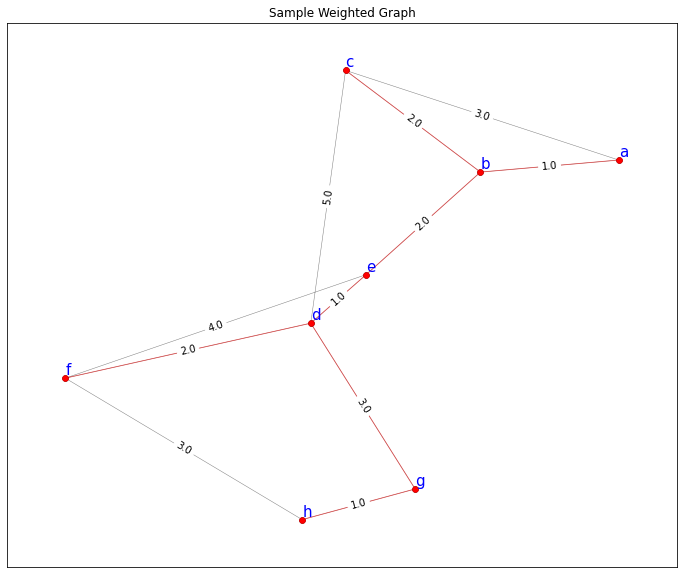

In [43]:
T = prims(G, initial_vertex = "c")
draw_weighted_graph(G, subgraph = T)